In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [2]:
df = pd.read_csv("dataset/feature_files/review_body-word2vec5-111909-512-nolda.csv")
rating = df["star_rating"]
df = df.drop(columns=["helpful_votes", "total_votes", "helpful_product", "star_rating"])

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-0.288502,-0.481055,0.258424,0.362731,0.475364,0.421039,0.014504,0.213545,-0.390066,0.103808,...,0.193389,-0.345230,-0.041291,0.063343,-0.230869,-0.018990,-0.462915,-0.762691,0.271782,-0.653218
1,0.173821,-0.214929,-0.098004,0.432866,0.370673,0.000804,-0.735449,0.162931,0.113988,0.468011,...,0.133606,-0.374622,-0.360892,-0.394297,-0.168498,-0.262506,-0.958892,0.099089,0.487517,-0.307144
2,-0.257559,-0.065606,0.344815,0.411276,0.090839,0.738248,0.282006,0.331116,-0.213441,0.092032,...,0.273857,-0.094201,0.245259,0.438028,-0.413395,0.425271,-0.417884,-0.886485,0.458968,-0.380352
3,-0.023537,0.186004,-0.018319,0.046002,0.285380,0.824158,0.240865,0.177934,-0.293685,0.369762,...,0.076834,0.171872,0.258420,0.169574,-0.280809,0.322120,-0.102916,-0.606135,0.186568,-0.477317
4,-0.832218,0.451893,0.474038,-0.018249,-0.478648,0.178108,-0.472869,-0.532138,-0.491469,-0.466011,...,0.594541,-0.302686,-0.511276,-0.590193,0.299716,-0.181081,-0.436865,0.996631,0.330113,-0.327735


In [4]:
rating.head()

0    5
1    5
2    5
3    5
4    3
Name: star_rating, dtype: int64

In [5]:
model = Sequential()

model.add(Dense(384, input_shape=(df.shape[1],), kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(384, kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(5, activation='relu'))
model.add(Activation('softmax'))
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 356)               182628    
_________________________________________________________________
batch_normalization_1 (Batch (None, 356)               1424      
_________________________________________________________________
activation_1 (Activation)    (None, 356)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 356)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 356)               127092    
_________________________________________________________________
batch_normalization_2 (Batch (None, 356)               1424      
_________________________________________________________________
activation_2 (Activation)    (None, 356)               0         
__________

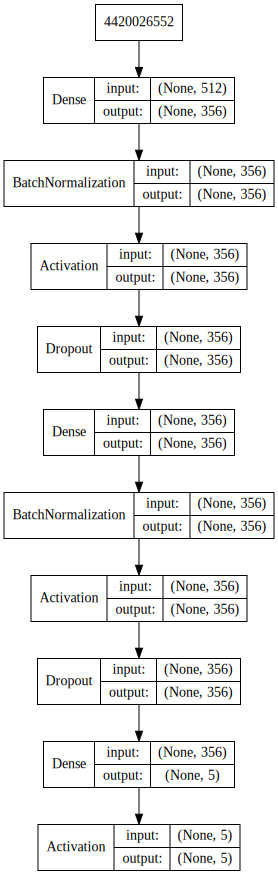

In [7]:
SVG(model_to_dot(model, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

In [8]:
# one hot encode rating
print(rating.shape)
print(type(rating))
y = OneHotEncoder().fit_transform(rating.values.reshape(len(rating), 1)).toarray()
y

(111909,)
<class 'pandas.core.series.Series'>


/Users/vinceluk/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]])

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df, y, random_state=1)

In [10]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
network_history = model.fit(x_train, y_train,
                      batch_size=128,
                      epochs=50,
                      verbose=1,
                      validation_split=0.2,
                      callbacks=[early_stop])

Instructions for updating:
Use tf.cast instead.
Train on 67144 samples, validate on 16787 samples
Epoch 1/50
67144/67144 [==============================] - 13s 199us/step - loss: 1.1335 - acc: 0.5788 - val_loss: 0.9910 - val_acc: 0.6386
Epoch 2/50
67144/67144 [==============================] - 13s 194us/step - loss: 1.0036 - acc: 0.6235 - val_loss: 0.9490 - val_acc: 0.6476
Epoch 3/50
67144/67144 [==============================] - 16s 243us/step - loss: 0.9734 - acc: 0.6333 - val_loss: 0.9284 - val_acc: 0.6538
Epoch 4/50
67144/67144 [==============================] - 13s 187us/step - loss: 0.9498 - acc: 0.6409 - val_loss: 0.9156 - val_acc: 0.6560
Epoch 5/50
67144/67144 [==============================] - 13s 193us/step - loss: 0.9360 - acc: 0.6458 - val_loss: 0.9065 - val_acc: 0.6610
Epoch 6/50
67144/67144 [==============================] - 14s 211us/step - loss: 0.9277 - acc: 0.6492 - val_loss: 0.8999 - val_acc: 0.6634
Epoch 7/50
67144/67144 [==============================] - 14s 206us/

In [11]:
scores = model.evaluate(x_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))


27978/27978 [==============================] - 3s 109us/step
Accuracy: 66.50%


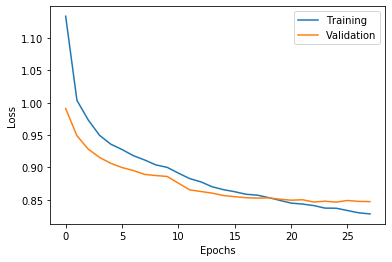

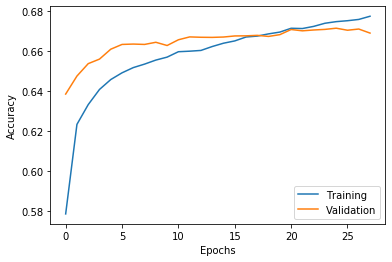

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)

In [13]:
y_predict = model.predict(x_test)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
y_predict

array([[6.71045855e-04, 6.71045855e-04, 5.10655763e-03, 1.16612919e-01,
        8.76938403e-01],
       [4.78648208e-02, 2.96775792e-02, 2.53597889e-02, 8.48232135e-02,
        8.12274575e-01],
       [1.03005813e-02, 1.03005813e-02, 8.68653134e-02, 4.29953396e-01,
        4.62580144e-01],
       ...,
       [5.19063883e-03, 5.19063883e-03, 1.49930818e-02, 6.49461687e-01,
        3.25163901e-01],
       [7.38570932e-04, 7.38570932e-04, 6.01245509e-03, 1.09249420e-01,
        8.83261025e-01],
       [1.29885925e-02, 3.24347615e-02, 1.57690227e-01, 2.16915026e-01,
        5.79971373e-01]], dtype=float32)

In [16]:
y_predict_df = pd.DataFrame(y_predict)
y_predict_df.head()

,0,1,2,3,4
0,0.000671,0.000671,0.005107,0.116613,0.876938
1,0.047865,0.029678,0.025360,0.084823,0.812275
2,0.010301,0.010301,0.086865,0.429953,0.462580
3,0.001020,0.001068,0.012592,0.206779,0.778541
4,0.800426,0.117517,0.032009,0.025024,0.025024


In [17]:
y_predict_unencoded = [row.idxmax() + 1 for index, row in y_predict_df.iterrows()]

In [18]:
y_test_df = pd.DataFrame(y_test)
y_test_unencoded = [row.idxmax() + 1 for index, row in y_test_df.iterrows()]

In [19]:
confusion_matrix(y_test_unencoded, y_predict_unencoded)

array([[ 3161,   141,   227,    72,   274],
       [  976,   125,   328,   165,   293],
       [  580,   152,   583,   577,   668],
       [  267,    71,   374,  1148,  2777],
       [  389,    50,   238,   754, 13588]])

In [20]:
print(classification_report(y_test_unencoded, y_predict_unencoded))

              precision    recall  f1-score   support

           1       0.59      0.82      0.68      3875
           2       0.23      0.07      0.10      1887
           3       0.33      0.23      0.27      2560
           4       0.42      0.25      0.31      4637
           5       0.77      0.90      0.83     15019

    accuracy                           0.66     27978
   macro avg       0.47      0.45      0.44     27978
weighted avg       0.61      0.66      0.63     27978

